In [2]:
import pandas as pd
import numpy as np
import os

In [9]:
files = [file for file in os.listdir('./SalesAnalysis/Sales_Data')]

main_df = pd.DataFrame()

for file in files:
    df = pd.read_csv('./SalesAnalysis/Sales_Data/'+file)
    main_df = pd.concat([main_df,df])

In [10]:
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [25]:
nan = main_df[main_df.isna().any(axis=1)]
nan.head()
main_df = main_df.dropna(how='all')

In [23]:
main_df = main_df[main_df['Order Date'].str[0:2]!='Or']
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


### Month column

In [26]:
main_df['Month'] = 0
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",0
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",0
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",0
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",0
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",0


In [32]:
main_df['Month'] = main_df['Order Date'].str[0:2]
main_df['Month'] = main_df['Month'].astype('int32')

In [33]:
main_df['Price Each'] = main_df['Price Each'].astype('float')
main_df['Quantity Ordered'] = main_df['Quantity Ordered'].astype('float')

In [34]:
main_df['Sales'] = main_df['Quantity Ordered']*main_df['Price Each']
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [37]:
df = main_df.groupby('Month').sum()
df.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903.0,1811768.38,1822256.73
2,13449.0,2188884.72,2202022.42
3,17005.0,2791207.83,2807100.38
4,20558.0,3367671.02,3390670.24
5,18667.0,3135125.13,3152606.75


In [39]:
import matplotlib.pyplot as plt

<BarContainer object of 12 artists>

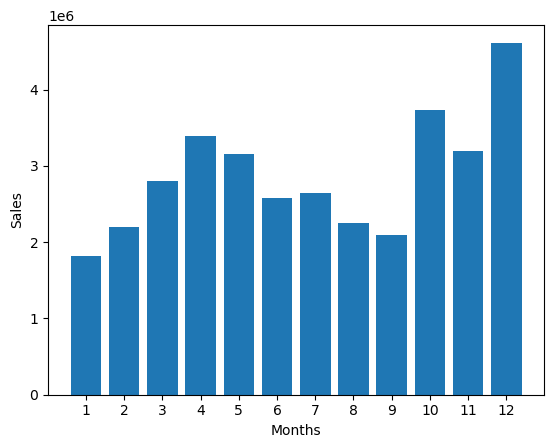

In [42]:
months = range(1,13)
plt.xticks(months)
plt.ylabel('Sales')
plt.xlabel('Months')
plt.bar(months,df['Sales'])

In [44]:
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [48]:
main_df['City'] = main_df['Purchase Address'].str.split(",")
main_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"[917 1st St, Dallas, TX 75001]"
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"[682 Chestnut St, Boston, MA 02215]"
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"[669 Spruce St, Los Angeles, CA 90001]"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"[669 Spruce St, Los Angeles, CA 90001]"
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"[333 8th St, Los Angeles, CA 90001]"


In [52]:
main_df = main_df.reset_index()

In [58]:
main_df.head()

,level_0,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0,0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,1,2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,2,3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,3,4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,4,5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [59]:
main_df = main_df.drop('index',axis=1)
main_df.head()

,level_0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [74]:
main_df['City'] = main_df['Purchase Address'].apply(lambda x:x.split(',')[1]+','+x.split(',')[2].split(' ')[1])
main_df.head()

,level_0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas,TX"
1,1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston,MA"
2,2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA"
3,3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA"
4,4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA"


In [97]:
result = main_df.groupby('City').sum()
result.head()

,level_0,Quantity Ordered,Price Each,Month,Sales,hour
City,,,,,,
"Atlanta,GA",1382417864,16602.0,2779908.20,104794,2795498.58,214264
"Austin,TX",919839697,11153.0,1809873.61,69829,1819581.75,141946
"Boston,MA",1864446291,22528.0,3637409.77,141112,3661642.01,288225
"Dallas,TX",1389357749,16730.0,2752627.82,104620,2767975.40,214390
"Los Angeles,CA",2755071796,33289.0,5421435.23,208325,5452570.80,427444


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

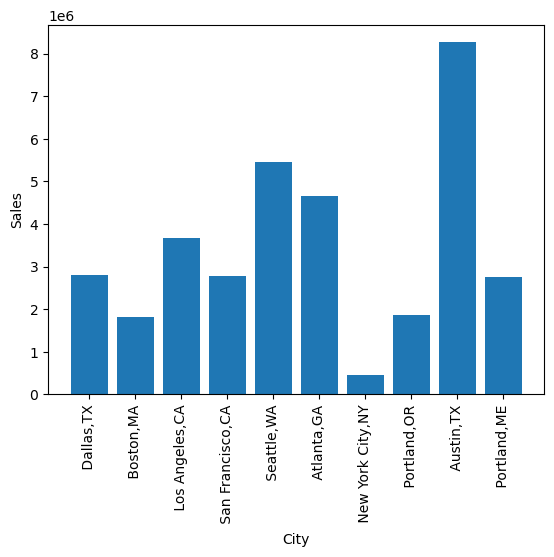

In [98]:
cities = main_df['City'].unique()
plt.bar(cities,result['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation='vertical')

In [86]:
main_df.head()

,level_0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas,TX"
1,1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston,MA"
2,2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA"
3,3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA"
4,4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA"


In [88]:
main_df['Order Date'] = pd.to_datetime(main_df['Order Date'])
main_df.head()

,level_0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas,TX"
1,1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston,MA"
2,2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA"
3,3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA"
4,4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA"


In [91]:
main_df['hour'] = main_df['Order Date'].dt.hour
main_df.head()

,level_0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour
0,0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas,TX",8
1,1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston,MA",22
2,2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA",14
3,3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA",14
4,4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA",9


In [122]:
temp = main_df.groupby('hour').sum()
temp.head()

,level_0,Quantity Ordered,Price Each,Month,Sales
hour,,,,,
0,367443791,4428.0,709296.70,27554,713721.27
1,220489275,2619.0,458490.00,16657,460866.88
2,114341823,1398.0,233833.64,8507,234851.44
3,76812823,928.0,144726.42,5904,145757.89
4,78222229,937.0,162058.18,6148,162661.01


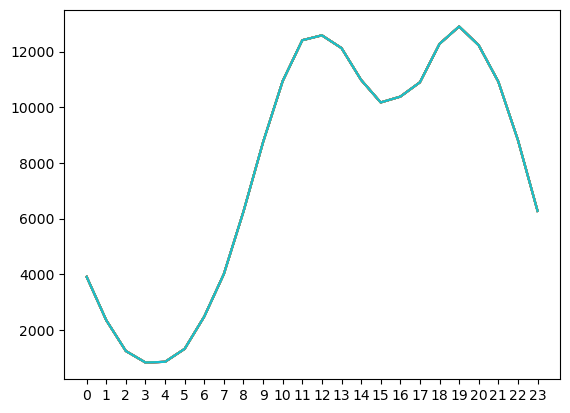

In [123]:
hours = [hour for hour,df in main_df.groupby('hour')]
plt.xticks(hours)
plt.plot(hours,main_df.groupby('hour').count())

In [161]:
main_df.head()

,level_0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour
0,0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas,TX",8
1,1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston,MA",22
2,2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA",14
3,3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA",14
4,4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA",9


In [164]:
main_df = main_df[main_df['Order ID'].duplicated(keep=False)]
main_df.head(100)

,level_0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour
2,2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA",14
3,3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA",14
17,17,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA",19
18,18,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,"Los Angeles,CA",19
29,29,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,"Boston,MA",11
...,...,...,...,...,...,...,...,...,...,...,...
1073,1073,177582,Bose SoundSport Headphones,1.0,99.99,2019-04-16 17:19:00,"707 9th St, Dallas, TX 75001",4,99.99,"Dallas,TX",17
1074,1074,177582,Wired Headphones,1.0,11.99,2019-04-16 17:19:00,"707 9th St, Dallas, TX 75001",4,11.99,"Dallas,TX",17
1084,1084,177592,iPhone,1.0,700.00,2019-04-19 11:10:00,"448 Maple St, San Francisco, CA 94016",4,700.00,"San Francisco,CA",11
1085,1085,177592,Lightning Charging Cable,2.0,14.95,2019-04-19 11:10:00,"448 Maple St, San Francisco, CA 94016",4,29.90,"San Francisco,CA",11


In [167]:
main_df['products'] = main_df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
main_df.head()

,level_0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour,products
2,2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA",14,"Google Phone,Wired Headphones"
3,3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA",14,"Google Phone,Wired Headphones"
17,17,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA",19,"Google Phone,USB-C Charging Cable"
18,18,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,"Los Angeles,CA",19,"Google Phone,USB-C Charging Cable"
29,29,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,"Boston,MA",11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [169]:
result = main_df[['Order ID','products']].drop_duplicates()
result.head()

,Order ID,products
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [172]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in main_df['products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 2140, ('Google Phone', 'USB-C Charging Cable'): 2116, ('iPhone', 'Wired Headphones'): 987, ('Google Phone', 'Wired Headphones'): 949, ('iPhone', 'Apple Airpods Headphones'): 799, ('Vareebadd Phone', 'USB-C Charging Cable'): 773, ('Google Phone', 'Bose SoundSport Headphones'): 503, ('USB-C Charging Cable', 'Wired Headphones'): 452, ('Vareebadd Phone', 'Wired Headphones'): 327, ('Lightning Charging Cable', 'Wired Headphones'): 253, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 214, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 211, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 182, ('Apple Airpods Headphones', 'Wired Headphones'): 170, ('Bose SoundSport Headphones', 'Wired Headphones'): 140, ('Lightning Charging Cable', 'USB-C Charging Cable'): 120, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 114, ('Lightning Charging Cable', 'Lightning Charging Cable'): 111, ('AA Batteries (4-pack)', 'Lightning Chargi